# Thinking about Data / Statistics for Data Science
## Assignment (Part B)


This Jupyter Notebook contains your assignment questions and a corresponding place for your answers. **All your answers for this assignment are to appear in this and only this notebook!**

Make sure that each cell of this notebook is appropriately set to either:
1. Markdown - for providing purely textual input
2. Code - for $R$ code; note comments can be included in this cell, but they should be prefixed with a # symbol

When answering a mathematical question, show how you got the answer so at least partial credit can be given if the provided answer is wrong. When providing textual input for an answer: adopt the philosophy that **"less can be more"**. Note that you may be asked to explain your answers -- so make sure your answers are yours.

**Submission deadline:**  11:59pm on Sunday the 10th of October 2021 (**there will be no extension**)

Late submissions will receive a 10\% reduction in marks for each day late.

If you submit late, it is your responsibility to download your assignment file from the Jupyter Server and e-mail the file to me (f.ubaudi@westernsydney.edu.au). The date of that e-mail will be taken as your submission date.

My advice is get started on this assignment immediately, that way you have time to seek assistance as needed.

When the deadline for this assignment arrives, a copy of this (your Jupyter Notebook) will be taken from your home directory. So if you do the assignment off-line, make sure you upload it back into your home directory before the deadline! Make sure you do not rename this file!

**You are encouraged to backup your assignment periodically**, by downloading a copy or making a copy in your home directory.

There are three questions and their worth is declared in the title. The question title also shows the break-down of marks according to the corresponding sub-questions. **This assignment is worth 20% of the final mark for this unit.** Altogether, your assignments are worth 40% of your final unit mark.

In [ ]:
# Adding comments to your code

# Any line that starts with a hash symbol is a comment
sample(0:7) # A comment can also end a line of code

## Question 1: (1 + 1 + 2 + 1 = 5 marks)

A study has been performed, in order to determine whether a *new* drug is in fact a statistically significant improvement over a *reference* drug (a known effective drug). The data file is called *"assignmentB_drugData.csv"*. The data file contains two variables: *response* and *drug*, which respectively correspond to, a measure of effectiveness and the specific drug in question. Consider effectiveness to report how effective the drug is, the larger the numeric value, the more effective.

(i) Write $R$ code to load the data file and produce an appropriate visualisation. Make the visualisation appropriate for use in a report.

In [11]:
# Your R code to answer the question

# Loading the drug data from file "assignmentB_drugData.csv".
drug_data <- read.csv("assignmentB_drugData.csv")
head(drug_data) # viewing the first 6 rows of the data

response,drug
<dbl>,<fct>
8.661020,new
11.431452,new
13.904322,ref
8.300664,new
14.662067,new
9.971347,ref


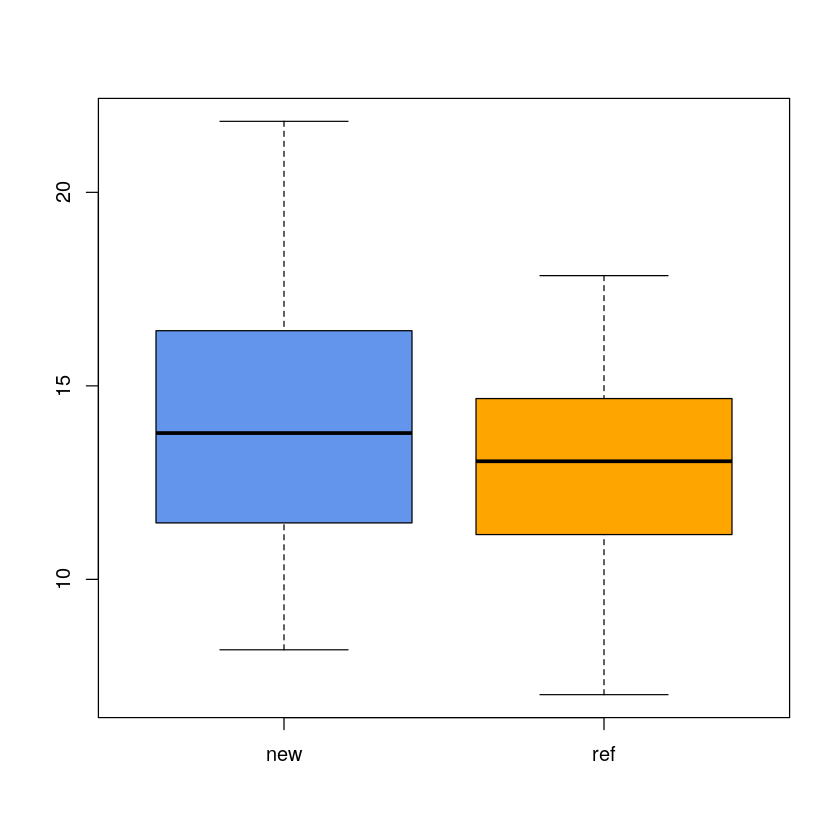

In [3]:
## Visualisation
boxplot(response~drug, data = drug_data, pch = 16,
        col = c("cornflowerblue","orange"))

(ii) Using the visualisation, very briefly report on what you see and predict whether the new drug is a statistically significant improvement over the old (ref)?

As per the box plot we can see that the median value for new drug is slightly higher than old(ref) drug. Moreover, new drug's has generally higher response than ref drug.

Based on this, we can say that the **new drug is a statistically significant improvement over the ref drug**.

(iii) Perform an appropriate hypothesis test in order to determine if a statistically significant *improvement* exists. Make sure you clearly state your hypotheses and any other relevant details. Show your working in clear logical steps.  Use a simulation consisting of 5,000 replications and a critical value of 0.05.

Difference in means of new drugs and ref drugs is: 1.088462 
Average difference in means for simulated results 0.003598862 

Calculated p-value from the simulation: 0.0362 

Is critical value greater than p-value? TRUE 


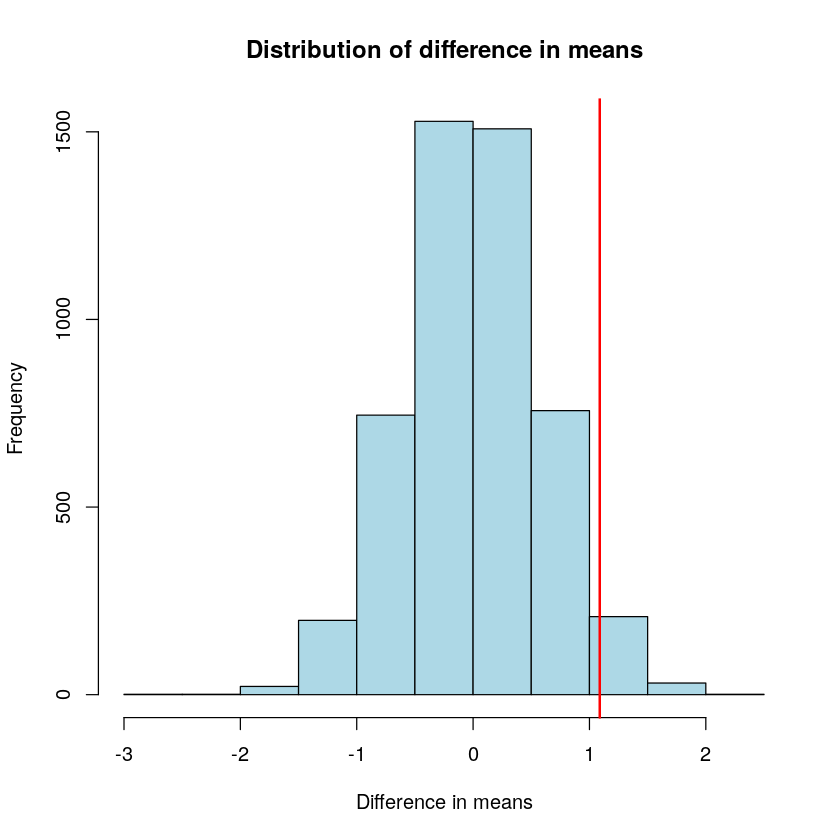

In [51]:
# For the Hypothesis, we are using null and alternate hypothesis as follows:

# H0: mu1 == mu2, There is no statistically significant improvement exist for new drug over ref drug.
# H1: mu1 > mu2, There exists a statistically significant improvement for new drug over ref drug.
# CV = 0.05 (5%)

cv <- 0.05 # critical value
replications <- 5000 # number of replications for simulation

# calculating mean data for new drug and ref drug
delta <- aggregate(response ~ drug, drug_data, mean)$response

# Calculating difference in means
cs <- -diff(delta)

cat("Difference in means of new drugs and ref drugs is:", cs, "\n")

# Simulating the difference in means by 5000 times for the shuffled drug categories within same data.
d <- replicate(replications, {
  shuffled_drug <- sample(drug_data$drug) ## Shuffling the drug categories
  delta <- aggregate(response ~ shuffled_drug, drug_data, mean)$response
  c <- -diff(delta)
})

cat("Average difference in means for simulated results",mean(d), "\n\n")

# Visualising the simulated outcome
hist(d, col = "lightblue", main = "Distribution of difference in means", xlab = "Difference in means")
abline(v = cs, col = "red", lwd = 2)

# counting the number of replications which have bigger difference than original difference.
count <- sum(d > cs)

# calculating p-value
pvalue <- count/replications
cat("Calculated p-value from the simulation:", pvalue, "\n\n")

cat("Is critical value greater than p-value?", cv > pvalue, "\n")
## if true then reject the null hypothesis.

(iv) Briefly state the conclusion of the above hypothesis test and a briefly interpret it's meaning.

**Answer:**

Conclusion : **We reject the null hypothesis.** 

From the histogram, we can see that calculated difference in means is slightly larger than average simulated distribution and p-value is much less than our assigned critical value of 0.05, therefore we can safely **reject the null hypothesis** which says there is no statistically significant improvement exist for new drug over ref drug.

Therefore, **There exists a statistically significant improvement for new drug over ref drug.**

## Question 2: (1 + 2 + 2 = 5 marks)

An experiment was performed to evaluate mechanical forces with respect to time. The data file is called "assignmentB_mechanics_1.csv". The data file contains two variables: *time* and *force*, the variable names respectively represent time and change in force. The question being asked is whether time and force may be connected?

(i) Write $R$ code to load the data file and produce an appropriate visualisation. Make the visualisation appropriate for use in a report.

In [12]:
# Your R code to answer the question

# Loading the drug data from file "assignmentB_mechanics_1.csv".
mechanics1 <- read.csv("assignmentB_mechanics_1.csv")
head(mechanics1) # viewing the first 6 rows of the data set

time,force
<dbl>,<dbl>
10.0,1410.45411
10.1,-1363.55945
10.2,718.85319
10.3,2180.75401
10.4,751.31454
10.5,50.49013


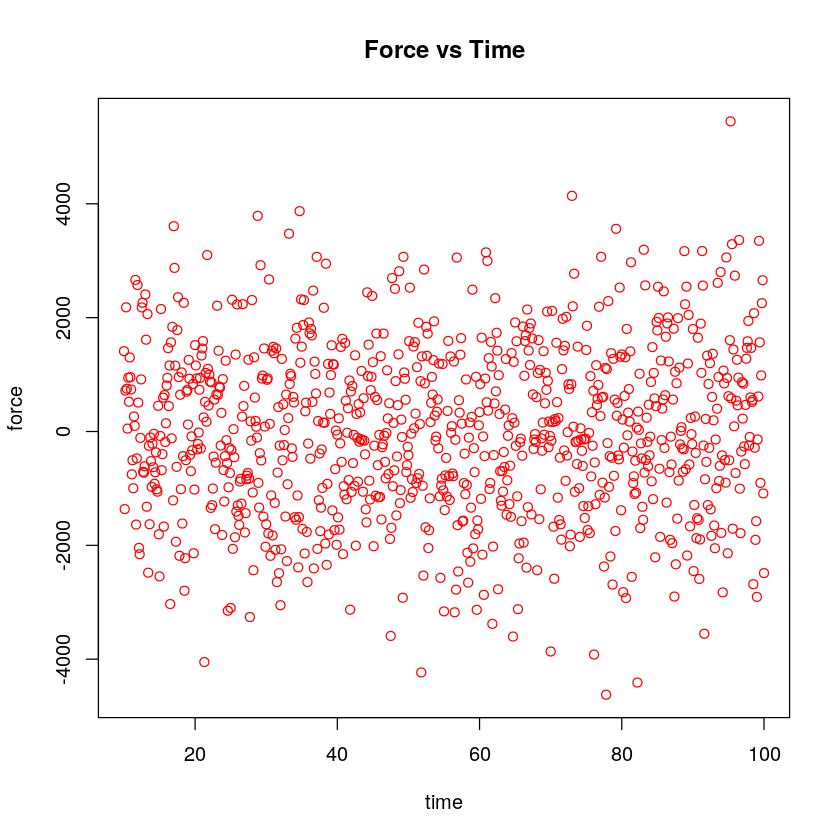

In [45]:
# Visualisation
plot(force~time, data = mechanics1, main = "Force vs Time", col = "red")

(ii) Using a confidence interval, determine if there is evidence that a relationship does not exist between time and force? Show your working in clear logical steps. Use a simulation consisting of 5,000 replications.

Spearman correlation between force and time:  0.02556038 
Confidence interval: 


2.5%       97.5% 
-0.04033571  0.09142128

Calculated p-value from the simulation: 0.5696 

Is critical value greater than p-value? FALSE 


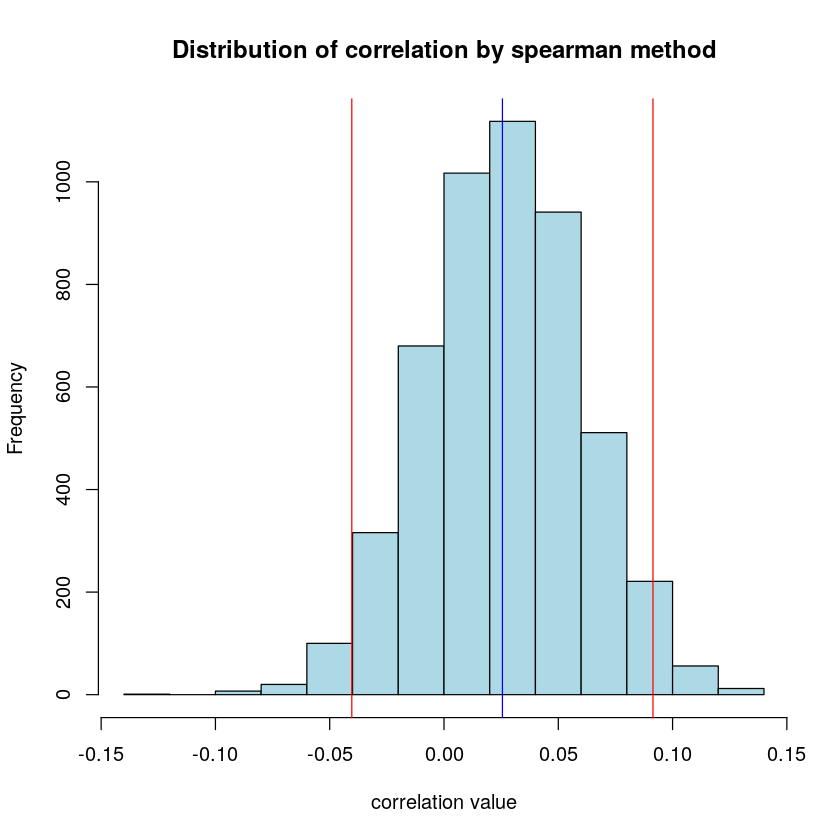

In [62]:
# For the Hypothesis, we are using null and alternate hypothesis as follows:

# H0: There is no relationship between time and force
# H1: There is a relationship between time and force
# CV = 0.05 (5%)

# setting the seed value
set.seed(2)

cv <- 0.05 ## critical value

# determining the correlation between force and time using spearman method because there is no linear relationship
# exists between force and time.
res <- cor(mechanics1$force, mechanics1$time, method = "spearman")
cat("Spearman correlation between force and time: ", res, "\n")

# fetching the number of rows in the data set
n = nrow(mechanics1)

# Simulating 5000 times and storing the correlation between force and time by resampling.
d = replicate(5000, {
    ind = sample(1:n, replace = TRUE, size = n)
    cor(mechanics1$force[ind], mechanics1$time[ind], method = "spearman")
})
# calculating the confidence interval for the above simulations
val <- quantile(d, c(0.025, 0.975))
cat("Confidence interval: \n")
val

# Visualising the distribution of simulation with its confidence interval
hist(d, xlab = "correlation value", main = "Distribution of correlation by spearman method", col = "lightblue")
abline(v = res, col = "blue")
abline(v = val, col = "red")


# calculating p-value
pvalue <- mean(abs(d) > abs(res))
cat("Calculated p-value from the simulation:", pvalue, "\n\n")

cat("Is critical value greater than p-value?", cv > pvalue, "\n")
## if true then reject the null hypothesis.

(iii) Briefly state the conclusion of the above hypothesis test and a briefly interpret it's meaning.

**Answer:**

Conclusion : **We can't reject the null hypothesis.** 

From the Confidence interval, we can see that 0 lies within the confidence interval and p-value is much higher than the Critical value of 0.05. Therefore, we can't reject the null hypothesis which states a relationship does not exist.

Therefore, **No relationship exists between force and time.**

## Question 3: (1 + 4 + 2 + 1.5 + 1.5 = 10 marks)

A refinement was performed on the experiment described in question 2. The data file is called "assignmentB_mechanics_2.csv". The data file contains two variables: *time* and *force*, the variable names respectively represent time and force. The question being asked is how *force* changes with respect to *time*? Note that a different force axis was considered.

(i) Write $R$ code to load the data file and produce an appropriate visualisation. Add a linear model to the visualisation. Make the visualisation appropriate for use in a report.

In [19]:
# Your R code to answer the question

# Loading the drug data from file "assignmentB_mechanics_2.csv".
mechanics2 <- read.csv("assignmentB_mechanics_2.csv")
head(mechanics2) # displaying the first 6 rows of the data set

time,force
<int>,<dbl>
10,22.94948
13,29.79796
16,13.14718
19,40.39359
22,25.27050
25,23.91431


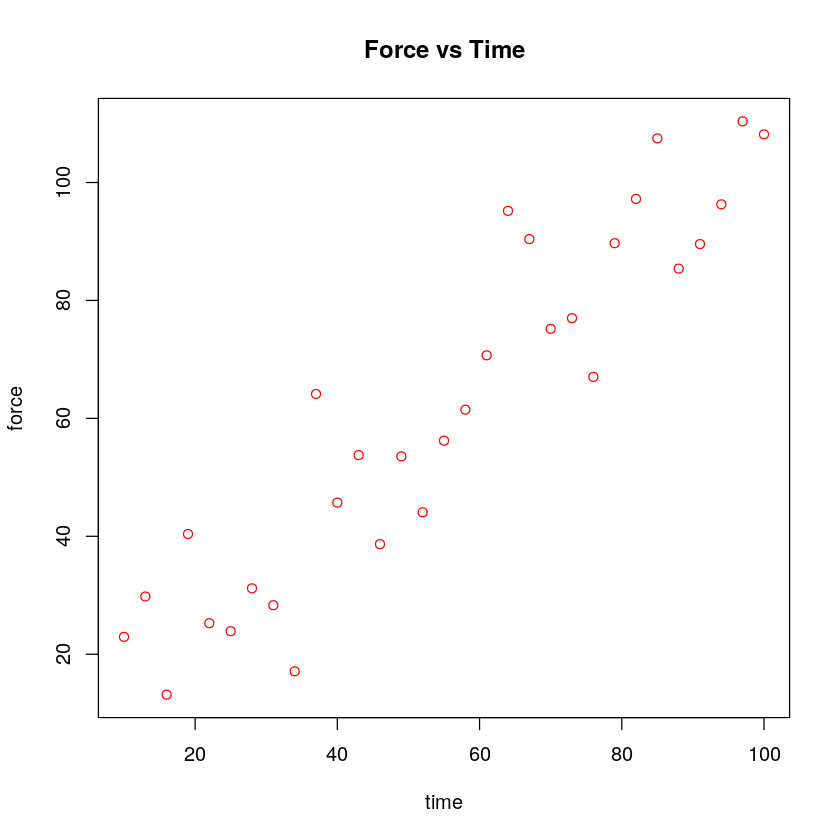

In [47]:
# Visualisation
plot(force~time, data = mechanics2, main = "Force vs Time", col = "red")

In [24]:
# creating a linear model
model <- lm(force~time, mechanics2)
summary(model) # Summary of the linear model
cat("------------------------------------------------------------\n")
# Extracting the coefficients of the resultant model
coeffs <- coef(model)
cat("Coefficients of the above model are: \n")
coeffs


Call:
lm(formula = force ~ time, data = mechanics2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.037  -7.814  -1.909   6.600  24.403 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.40085    4.66252   1.158    0.256    
time         1.02165    0.07619  13.409 5.83e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.38 on 29 degrees of freedom
Multiple R-squared:  0.8611,	Adjusted R-squared:  0.8563 
F-statistic: 179.8 on 1 and 29 DF,  p-value: 5.829e-14


------------------------------------------------------------
Coefficients of the above model are: 


(Intercept)        time 
   5.400849    1.021649

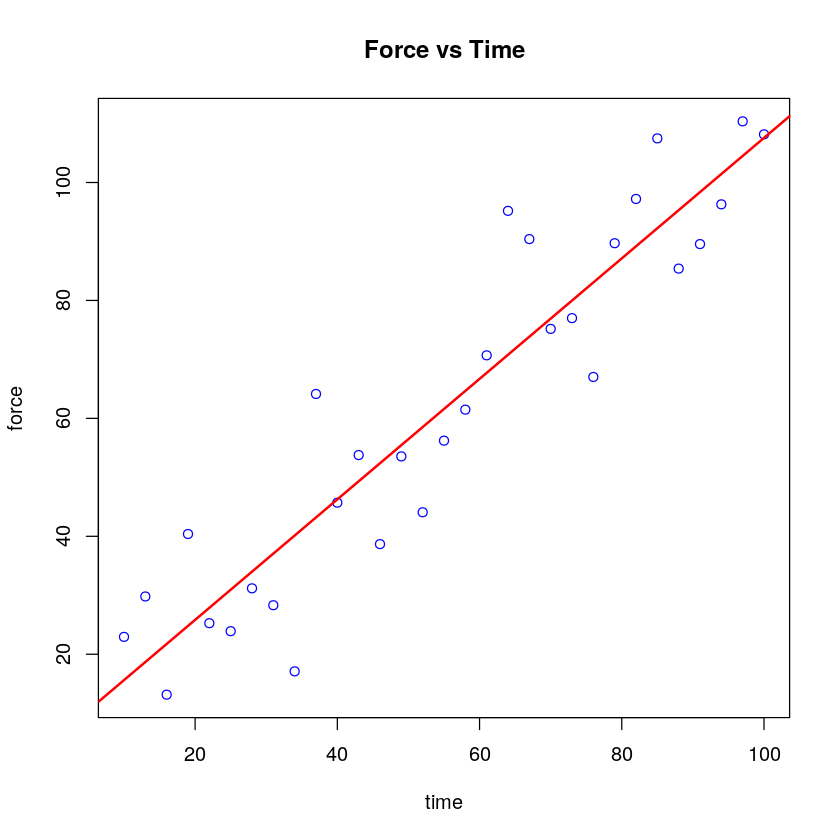

In [48]:
# Visualising the linear model
plot(mechanics2, main = "Force vs Time", col = "blue")
abline(coef = coeffs, col = "red", lwd = 2)

(ii) Using a hypothesis test, determine whether the slope of the linear model constructed in (i) could be 1.0 in general (hence wrt population)? Make sure you clearly state your hypotheses and any other relevant details. Show your working in clear logical steps. Use a simulation consisting of 5,000 replications and a critical value of 0.05.

Slope is : 0.0216487 
p-value is:  0.7774 

is Critical value greater than p-value? FALSE 


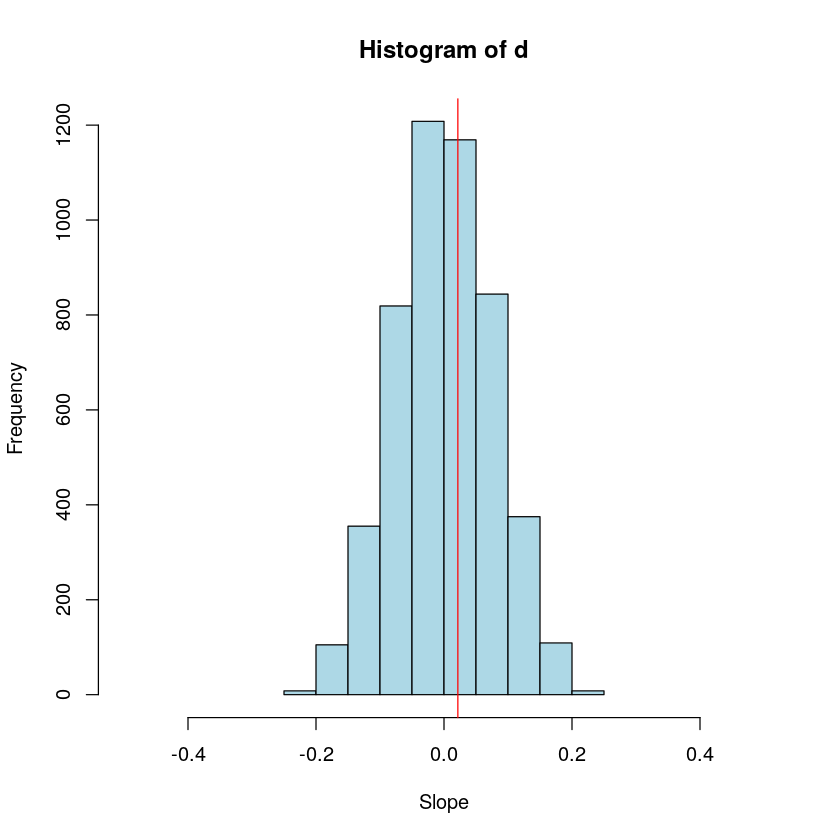

In [53]:
# Your R code to answer the question

# H0: Slope could be 1.0 in general
# H1: Slope cannot be 1.0 in general
# CV = 0.05 (5%)

cv <- 0.05 # critical value

# constructing a linear model for slope = 1
m <- lm(force - time ~ time, mechanics2)
# extracting the slope's coefficient from the model.
b <- coef(m)[2]
cat("Slope is :",b, "\n")

# simulating and calculating slope 5000 times by resampling method
d <- replicate(5000, {
    t <- sample(mechanics2$time)
    m <- lm(force - time ~ t, mechanics2)
    coef(m)[2]
})

# visualising the distribution of simulated result
hist(d, xlim = c(-1,1) * 0.5, xlab = "Slope", col = "lightblue")
abline(v = b, col = "red")

# calculating the p-value
pValue = mean(d > abs(b)) + mean(d < -abs(b))
cat("p-value is: ",pValue, "\n\n")

cat("is Critical value greater than p-value?", cv > pValue, "\n")

(iii) Using a simulation consisting of 5,000 replications, determine a 95% confidence interval for the slope. Show your working in clear logical steps.

95% Confidence interval: 


2.5%     97.5% 
0.8980822 1.1663970

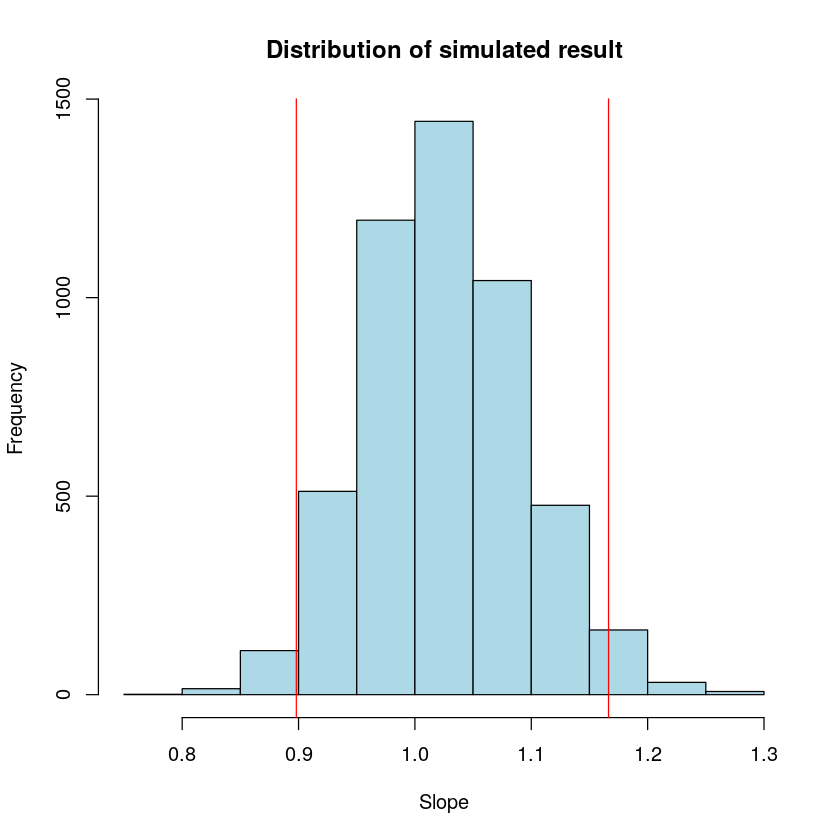

In [54]:
# Your R code to answer the question

set.seed(2) # setting the seed value
# calculating the number of rows in the given data set
rowCount <- nrow(mechanics2)

# simulating the slope of a linear model 5000 times using bootstrapping method
d1 <- replicate(5000,
               {
                 ind <- sample(1:rowCount,
                               replace = TRUE)
                 s <- mechanics2[ind, ]
                 m1 <- lm(force ~ time, s)
                 coef(m1)[2]
               })
# calculating the 95% confidence interval
range <- quantile(d1, c(0.025, 0.975))

cat("95% Confidence interval: \n")
range

# Visualising the distribution of simulated result and their confidence interval
hist(d1, main = "Distribution of simulated result", xlab = "Slope", col = "lightblue")
abline(v = range, col = "red")

(iv) Regarding sub-question (ii), state your conclusion to the test and how you arrived at that conclusion. Make sure you state what the conclusion means with respect to the slope.

**Answer:**

Conclusion : **We can't reject the null hypothesis.** 

From the histogram, we can see that calculated coefficient is in the range of simulated coefficients. Moreover, p-value is larger than the stated crticial value of 0.05. By this, we can't reject the null hypothesis which states "Slope could be 1.0 in general".

Therefore, **Slope can be 1.0 in general.**

(v) Regarding sub-question (iii), interpret the implications of the confidence interval. Also relate the implications to the findings of sub-question (ii).

**Answer:**

The range of the confidence interval determines where the actual slope value lies. The range of the 95% confidence interval is from 0.89 to 1.16.

As per the conclusion of sub question(ii), we determined slope could be 1.0 in general and 1.0 lies in between the calculated range of confidence interval. Therefore, we can safely say that slope could be 1.0 in general